In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import os

In [2]:
#TEST TO MAKE SURE DATA CAN BE READ
dataDir = 'CleanDataFinal'

filepath = os.path.join(dataDir, 'trainFeaturesFinal.csv')
data_features = pd.read_csv (filepath, index_col = 'HHX')
print('trainX shape:', data_features.shape)

filepath = os.path.join(dataDir, 'trainTargetFinal.csv')
data_target = pd.read_csv (filepath, index_col = 'HHX')
print('trainY shape:', data_target.shape)

filepath = os.path.join(dataDir, 'testFeaturesFinal.csv')
data_features_test = pd.read_csv (filepath, index_col = 'HHX')
print('testX shape:', data_features_test.shape)

filepath = os.path.join(dataDir, 'testTargetFinal.csv')
data_targe_test = pd.read_csv (filepath, index_col = 'HHX')
print('testY shape:', data_targe_test.shape)

trainX shape: (22222, 5290)
trainY shape: (22222, 1)
testX shape: (5556, 5290)
testY shape: (5556, 1)


In [22]:
# Import data
data_train_features = data_features.dropna(axis=1)
data_train_target = data_target.dropna(axis=1)


data_test_features = data_features_test.dropna(axis=1)
data_test_targe = data_targe_test.dropna(axis=1)



Y_train = data_train_target.loc[:,'PHQCAT_A'].to_numpy()
X_train = data_train_features.to_numpy()


Y_test = data_test_targe.loc[:,'PHQCAT_A'].to_numpy()
X_test = data_test_features.to_numpy()

In [4]:
X_train.shape

(22222, 5290)

In [5]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from yellowbrick.classifier import ROCAUC


# Setting up the model
model = SVC(C=20,class_weight='balanced',decision_function_shape='ovr',probability=True, kernel='linear', tol=0.01, cache_size=6000*5)
model.fit(X_train, np.ravel(Y_train))

SVC(C=20, cache_size=30000, class_weight='balanced', kernel='linear',
    probability=True, tol=0.01)

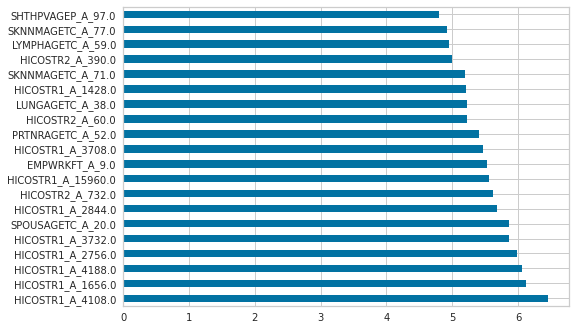

In [8]:
pd.Series(abs(model.coef_[0]), index=data_train_features.columns).nlargest(20).plot(kind='barh')

In [9]:
y_predict = model.predict(X_test)
# score = roc_auc_score(Y_test, np.ravel(y_predict))
# Creating Print Results
string = f'The result of {model}:\n'
string += f'{classification_report(Y_test, np.ravel(y_predict))}\n'
print(string)
# print(score)

The result of SVC(C=20, cache_size=30000, class_weight='balanced', kernel='linear',
    probability=True, tol=0.01):
              precision    recall  f1-score   support

           1       0.92      0.87      0.90      4562
           2       0.30      0.44      0.36       637
           3       0.27      0.24      0.25       220
           4       0.48      0.39      0.43       137

    accuracy                           0.79      5556
   macro avg       0.50      0.49      0.49      5556
weighted avg       0.82      0.79      0.80      5556




In [10]:
roc_auc_test = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

In [11]:
roc_auc_test

0.8704468908505494

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


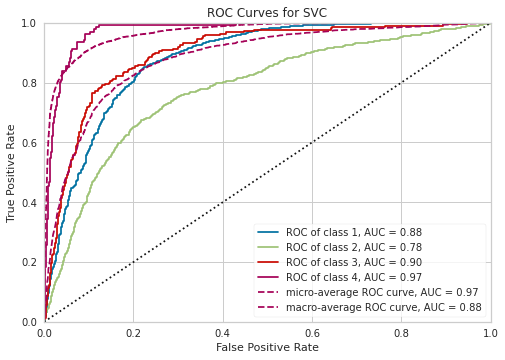

In [12]:
# visualizer = ROCAUC(model, binary=True)
visualizer = ROCAUC(model)
visualizer.fit(X_train, np.ravel(Y_train))
visualizer.score(X_test,np.ravel(Y_test))
visualizer.poof()

In [ ]:
# Choose Features from the dataset
from sklearn.feature_selection import RFECV
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(model, X_test, np.ravel(Y_test), n_jobs=20,n_repeats=5,random_state=0, scoring='roc_auc_ovr_weighted')
run_time = time.time() - start_time
print('Take', run_time)

In [1]:
# # impute data list
import os
path = 'ImputedData'
data_list = os.listdir(path)
data_list = [x for x in data_list if x.endswith('.csv')]


total = 0
for data in data_list:
    data_path = os.path.join(path, data)
    X_test = pd.read_csv(data_path, index_col = 'HHX').to_numpy()

    roc_auc_test = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')
    total += roc_auc_test
    print(roc_auc_test)

acc = total/len(data_list)
acc

In [ ]:
svm_importance = pd.Series()